# Project Name :  Concrete Compressive Strength Prediction using DL Auto Keras(Auto ML)

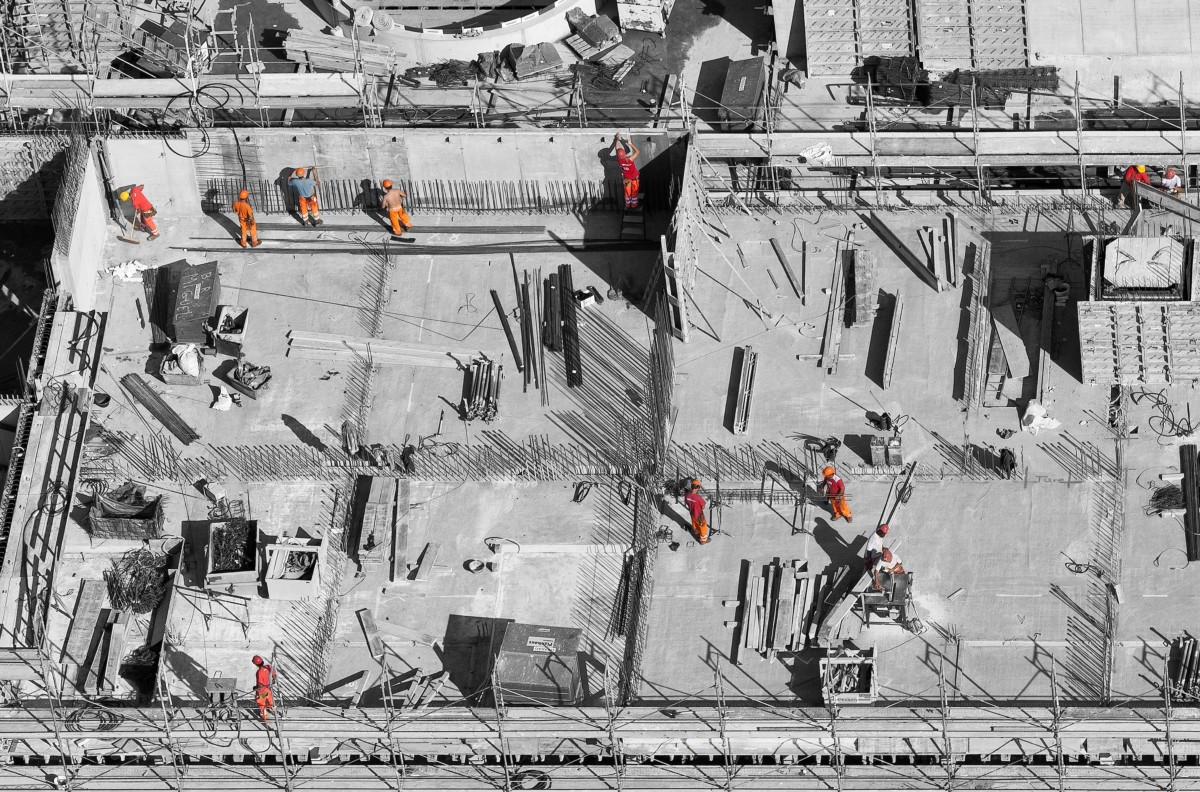

## Abstract

###  Concrete is the most important material in civil engineering. Theconcrete compressive strength is a highly nonlinear function of age andingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate

## Data Characteristics

### The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory.

## Time Line o fthe Project:
- Data Analysis
- Data Preprocessing
- Feature Engineering
- Model Building using DL
- Model Building using Auto Keras

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/concrete_data.csv")
df.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.shape

## Data Analysis

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.isna().sum()

### Heatmap

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
for i in df.columns:
    for j in df.columns:
        plt.figure(figsize=(9,7))
        sns.scatterplot(x=i,y=j,hue="concrete_compressive_strength",data=df)
        plt.show()

### Outlier Analysis

In [ ]:
def outlier(data,column):
    plt.figure(figsize=(5,3))
    sns.boxplot(data[column])
    plt.title("{} distribution".format(column))

In [ ]:
for i in df.columns:
    outlier(df,i)

#### Findind the min and max value for every feature

In [ ]:
def end_value_show(data,column):
    print("min value of {} is {} \nmax value of {} is {}".format(column,data[column].min(),column,data[column].max()))

In [ ]:
for i in df.columns:
    end_value_show(df,i)

#### Replacing the Outliers

In [ ]:
df=df[df["blast_furnace_slag"]<350]
df=df[(df["water"]<246) & (df["water"]>122)]
df=df[df["superplasticizer"]<25]
df=df[df["age"]<150]

### Feature Engineering

In [ ]:
df.columns

In [ ]:
df.drop(["blast_furnace_slag"],axis=1,inplace=True)
df.drop(["coarse_aggregate"],axis=1,inplace=True)
df.drop(["fine_aggregate "],axis=1,inplace=True)

In [ ]:
df.columns

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

### Splitting the Data

In [ ]:
x=df.drop(["concrete_compressive_strength"],axis=1)
y=df["concrete_compressive_strength"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
x_train.shape

## Model Building using DL

### We will be using Keras Sequential Model for this project

In [ ]:
from tensorflow.keras import models,layers

In [ ]:
model=models.Sequential()
model.add(layers.Dropout(0.1))
model.add(layers.Dense(100,activation='relu',input_shape=(x_train.iloc[1].shape)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(5,activation='tanh'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

In [ ]:
model.fit(x_train,y_train,epochs=100,batch_size=1,validation_data=(x_test,y_test))

In [ ]:
model.evaluate(x_test,y_test)

In [ ]:
pred=model.predict(x_test)
pred[4]

## Using Auto Keras

 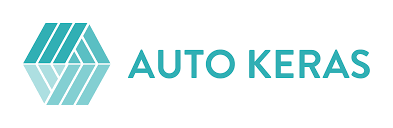

## AutoKeras: An AutoML system based on Keras. It is developed by DATA Lab at Texas A&M University

## Installing Auto Keras

In [ ]:
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1


In [ ]:
!pip install autokeras

In [ ]:
!pip show autokeras

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf


import autokeras as ak

In [ ]:
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
)

In [ ]:
reg.fit(x=x_train, y=y_train, verbose=0)

In [ ]:
# evaluate the model
mae, _  = reg.evaluate(x_test, y_test, verbose=0)
#print('MAE: %.3f' % mae)
# use the model to make a prediction
yhat_test = reg.predict(x_test)

# get the best performing model
model = reg.export_model()


In [ ]:
# summarize the loaded model
model.summary()

In [ ]:
yhat_test

In [ ]:
y_test